In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**باینری کردن تصویر**

(<matplotlib.image.AxesImage at 0x7f02f35fda90>, Text(0.5, 1.0, 'th'))

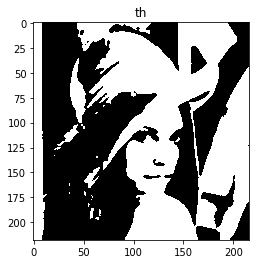

In [80]:
import cv2

src = cv2.imread("/content/drive/MyDrive/imageprocessing/lena.JPG", 1) # read input image
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale
blur = cv2.blur(gray, (3, 3)) # blur the image
ret, thresh = cv2.threshold(blur, 90, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, cmap='gray'),plt.title("th")

**فرسایش و گسترش**

(<matplotlib.image.AxesImage at 0x7f02f3b98290>,
 Text(0.5, 1.0, 'original image'))

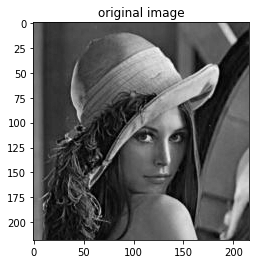

In [61]:
# Python program to demonstrate erosion and dilation of images.
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

# Reading the input image
img = cv2.imread('/content/drive/MyDrive/imageprocessing/lena.JPG')
gray_image = rgb2gray(img)

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

img_erosion = cv2.erode(gray_image, kernel, iterations=1)
img_dilation = cv2.dilate(gray_image, kernel, iterations=1)

plt.imshow(gray_image, cmap='gray'),plt.title("original image")

**فرسایش**

(<matplotlib.image.AxesImage at 0x7f02f3b7ba90>, Text(0.5, 1.0, 'erosion'))

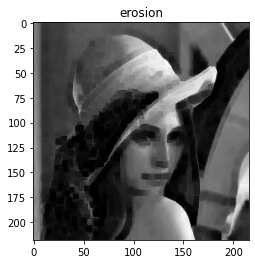

In [62]:
plt.imshow(img_erosion, cmap='gray'),plt.title("erosion")

**گسترش**

(<matplotlib.image.AxesImage at 0x7f02f3ae8fd0>, Text(0.5, 1.0, 'dilation'))

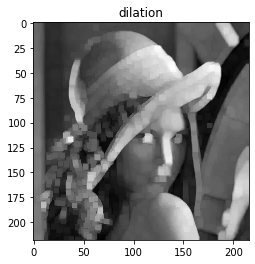

In [63]:
plt.imshow(img_dilation, cmap='gray'),plt.title("dilation")

**بازکردن**

In [64]:
opening = cv2.morphologyEx(gray_image, cv2.MORPH_OPEN, kernel)

(<matplotlib.image.AxesImage at 0x7f02f3a64590>, Text(0.5, 1.0, 'opening'))

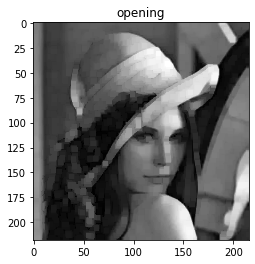

In [65]:
plt.imshow(opening, cmap='gray'),plt.title("opening")

**بستن**

In [66]:
closing = cv2.morphologyEx(gray_image, cv2.MORPH_CLOSE, kernel)

(<matplotlib.image.AxesImage at 0x7f02f39d0b10>, Text(0.5, 1.0, 'closing'))

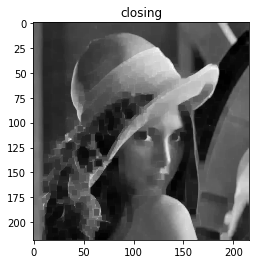

In [67]:
plt.imshow(closing, cmap='gray'),plt.title("closing")

**استخراج مرز**

In [68]:
extract_boundary = gray_image - img_erosion

(<matplotlib.image.AxesImage at 0x7f02f394b090>,
 Text(0.5, 1.0, 'extract_boundary'))

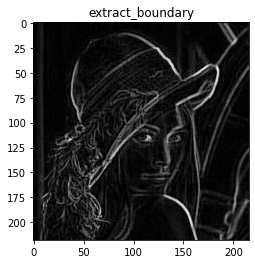

In [69]:
plt.imshow(extract_boundary, cmap='gray'),plt.title("extract_boundary")

**گرادیان**

In [70]:
morph_gradien = img_dilation - img_erosion

(<matplotlib.image.AxesImage at 0x7f02f3939710>,
 Text(0.5, 1.0, 'morph_gradien'))

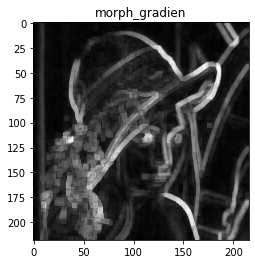

In [71]:
plt.imshow(morph_gradien, cmap='gray'),plt.title("morph_gradien")

**تبدیل بالا کلاه**

In [72]:
tophat = gray_image - opening

(<matplotlib.image.AxesImage at 0x7f02f38a7d50>, Text(0.5, 1.0, 'tophat'))

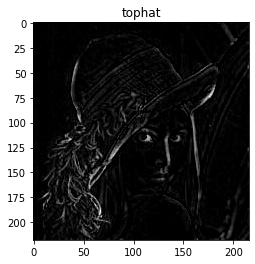

In [73]:
plt.imshow(tophat, cmap='gray'),plt.title("tophat")

**تبدیل پایین کلاه**

In [74]:
blackhat = closing - gray_image

(<matplotlib.image.AxesImage at 0x7f02f381aa90>, Text(0.5, 1.0, 'blackhat'))

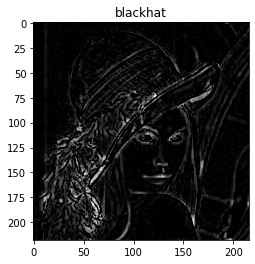

In [75]:
plt.imshow(blackhat, cmap='gray'),plt.title("blackhat")

**پر کردن حفره**

In [89]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.exposure import rescale_intensity

image = data.moon()

# Rescale image intensity so that we can see dim features.
image = rescale_intensity(image, in_range=(50, 200))

In [90]:
import numpy as np
from skimage.morphology import reconstruction

seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image

filled = reconstruction(seed, mask, method='erosion')

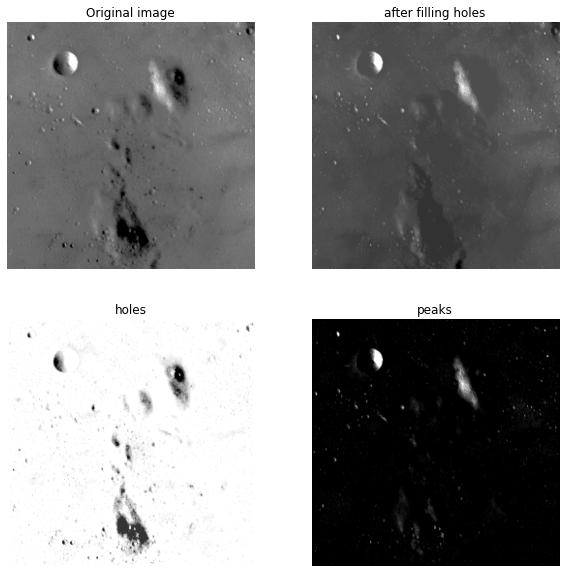

In [91]:
seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
rec = reconstruction(seed, mask, method='dilation')

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = ax.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original image')
ax[0].axis('off')

ax[1].imshow(filled, cmap='gray')
ax[1].set_title('after filling holes')
ax[1].axis('off')

ax[2].imshow(image-filled, cmap='gray')
ax[2].set_title('holes')
ax[2].axis('off')

ax[3].imshow(image-rec, cmap='gray')
ax[3].set_title('peaks')
ax[3].axis('off')
plt.show()

**اسکلت بندی**

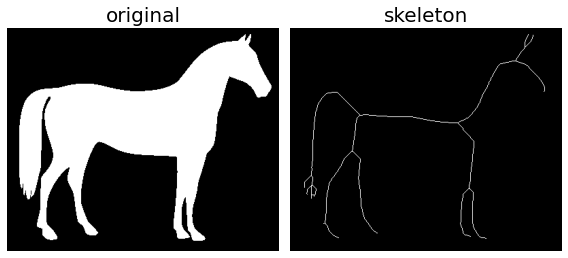

In [79]:
from skimage.morphology import skeletonize
from skimage import data
import matplotlib.pyplot as plt
from skimage.util import invert

# Invert the horse image
image = invert(data.horse())

# perform skeletonization
skeleton = skeletonize(image)

# display results
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 4),
                         sharex=True, sharey=True)

ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('original', fontsize=20)

ax[1].imshow(skeleton, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('skeleton', fontsize=20)

fig.tight_layout()
plt.show()

**Convex Hull**

**پوسته محدب**

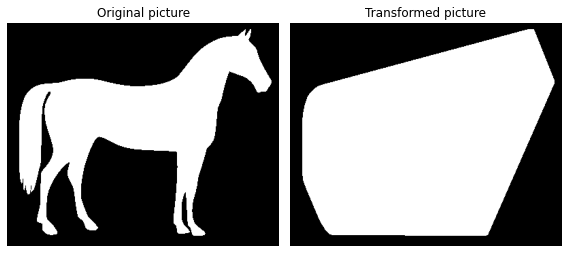

In [52]:
import matplotlib.pyplot as plt

from skimage.morphology import convex_hull_image
from skimage import data, img_as_float
from skimage.util import invert

# The original image is inverted as the object must be white.
image = invert(data.horse())

chull = convex_hull_image(image)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
ax = axes.ravel()

ax[0].set_title('Original picture')
ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_axis_off()

ax[1].set_title('Transformed picture')
ax[1].imshow(chull, cmap=plt.cm.gray)
ax[1].set_axis_off()

plt.tight_layout()
plt.show()

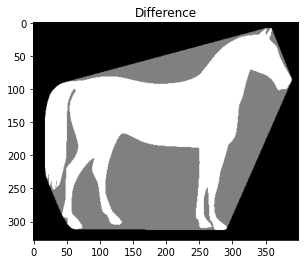

In [53]:
chull_diff = img_as_float(chull.copy())
chull_diff[image] = 2

fig, ax = plt.subplots()
ax.imshow(chull_diff, cmap=plt.cm.gray)
ax.set_title('Difference')
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread, imshow
from skimage.draw import circle
from skimage.morphology import erosion, dilation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: `draw.circle` is deprecated in favor of `draw.disk`.`draw.circle` will be removed in version 0.19
  


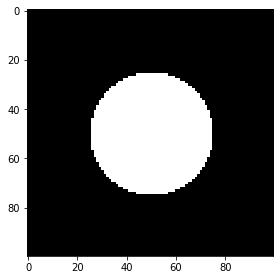

In [ ]:
circ_image = np.zeros((100, 100))
circ_image[circle(50, 50, 25)] = 1
imshow(circ_image);

/usr/local/lib/python3.7/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


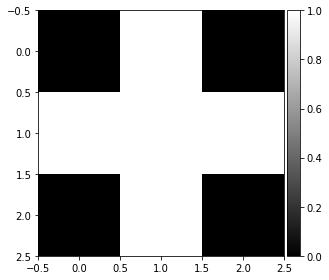

In [ ]:
cross = np.array([[0,1,0],
                  [1,1,1],
                  [0,1,0]])
imshow(cross, cmap = 'gray');

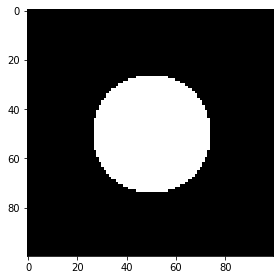

In [ ]:
eroded_circle = erosion(circ_image, cross)
imshow(eroded_circle);

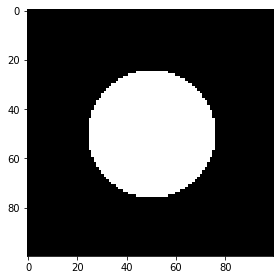

In [ ]:
dilation_circle = dilation(circ_image, cross)
imshow(dilation_circle);